# TERM-PROJECT: Mid-term Report

## Deblurring selfies using convolutional auto encoder

### 산업경영공학과 2020103913 김동규

### Before start

[텀프로젝트 제안서]('./2020103913_term_project_proposal.ipynb')

위 텀프로젝트 제안서에 이 프로젝트의 전체적인 내용과 제안한 이유 (Overview), 그리고 제작계획 및 원리 설명이 나와있습니다. 참고 부탁드립니다. 

이번 중간 보고서에서는 데이터 전처리 과정을 설명합니다. 목차는 다음과 같습니다. 

1. 이미지 불러오기 (인스타 및 kaggle)
2. 이미지에 사람 얼굴이 있는지 검사 (opencv 이용)
3. 사람 얼굴을 중심으로 특정 해상도로 이미지 자르기
4. train/validation/test 데이터 분리하기
5. 데이터에 랜덤으로 blur 처리하기

더불어, 모든 내용은 이 [github repo](https://github.com/vkehfdl1/deblur_autoencoder_selfie)에 공유되고 있습니다. pull request, fork, clone, issue 제보는 언제든지 환영합니다.

추가로, 모든 코딩은 linux 환경 및 kaggle docker 위에서 작업하였으며, 이에 따라 기타 OS에서는 실행이 되지 않을 수도 있는 점 참고 부탁드립니다.

### 이미지 불러오기

먼저 인스타그램에서 '#증사'를 검색하면 나오는 사진들을 자동으로 크롤링하였습니다. BeautifulSoup4와 Selenium, 그리고 chrome driver를 활용하였습니다. 코드는 [여기서](./get_data_insta.ipynb) 확인하실 수 있습니다. 

더불어, kaggle에서 human face dataset을 이용하여 사진들을 확보하였습니다. 이는 kaggle API를 이용해서 쉽게 다운로드 받을 수 있었습니다. [관련정보](https://teddylee777.github.io/kaggle/Kaggle-API-%EC%82%AC%EC%9A%A9%EB%B2%95) 
```
kaggle datasets download -d ashwingupta3012/human-faces
```
아래는 인스타그램에서 크롤링한 사진들입니다.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import cv2
import glob
import sys

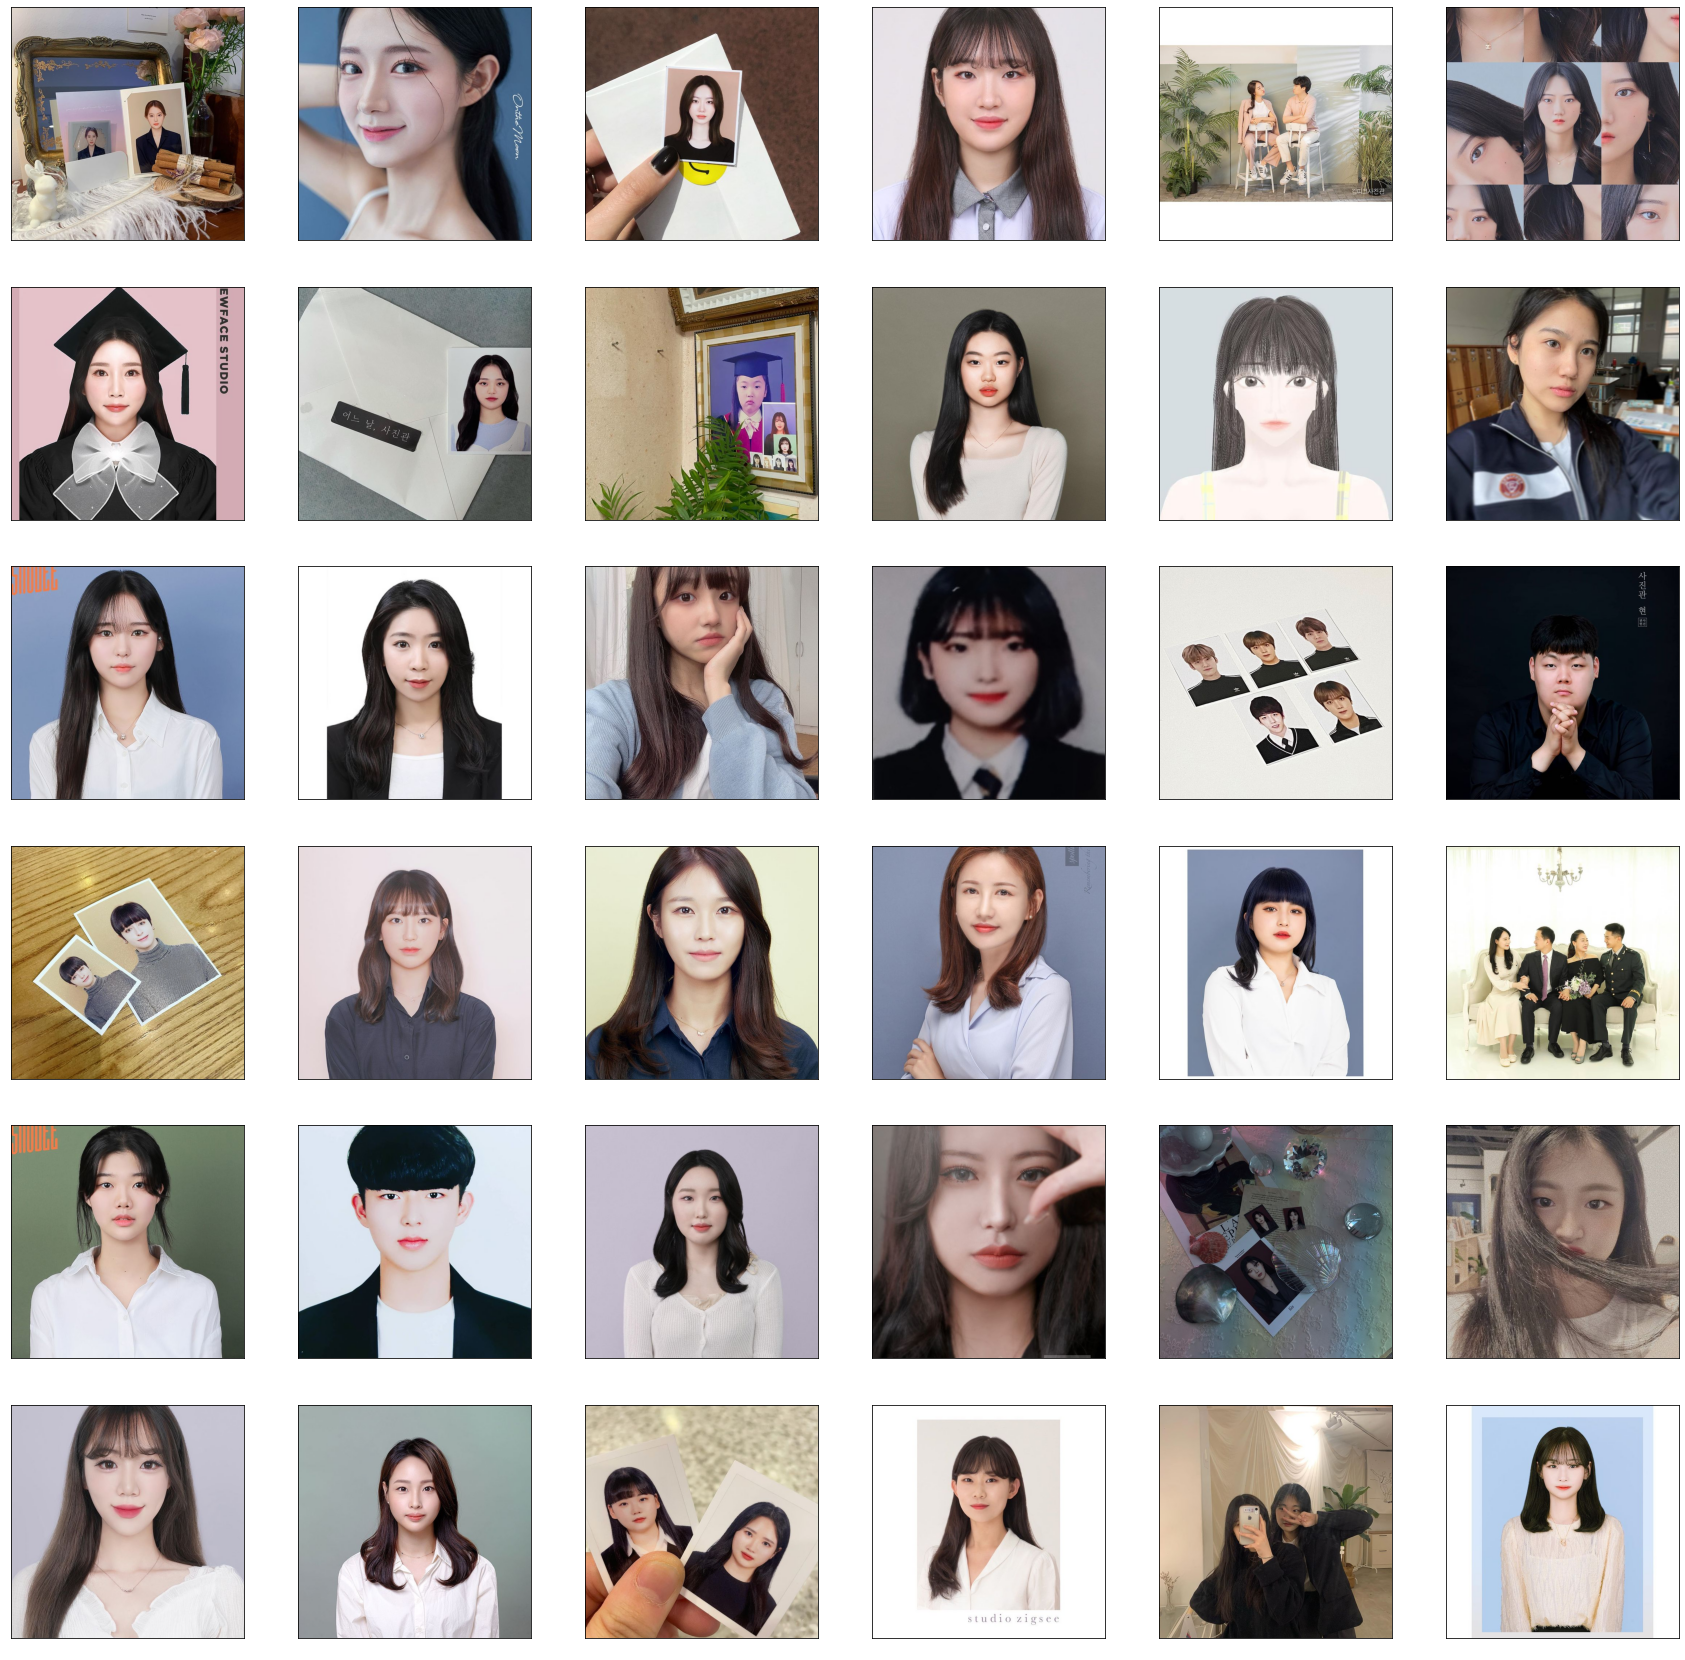

In [2]:
#https://blog.daum.net/geoscience/1263
fig = plt.figure(figsize=(30,30)) # rows*cols 행렬의 i번째 subplot 생성
rows = 6
cols = 6
i = 1

for filename in glob.glob("./img/*.jpg"):
    if (i > rows*cols):
        break
    img = cv2.imread(filename)
    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.set_xlabel(filename.split('/')[-1])
    ax.xaxis.label.set_color('white') #label 이름이 안 보이면  dark mode에서 작업하세요. 
    ax.set_xticks([]), ax.set_yticks([])
    i += 1
plt.show()

### 이미지에서 사람 얼굴 탐지

[opencv](https://opencv.org/)를 이용하여 간단하게 사람의 얼굴을 탐지할 수 있습니다. 이것을 기준으로 하여 인스타그램에서 크롤링한 사진 중에서, 사람의 얼굴이 없거나 적합하지 않은 사진을 자동으로 분류해낼 수 있습니다. 자세한 코드는 [이곳](./visualize_pics.ipynb)에서 확인할 수 있습니다.